# De eindige differentiemethode

Bij het modelleren gebruik je functies, die een gegeven input omzetten naar een output. Beschouw bijvoorbeeld de functie $f$ met voorschrift $f(t) = t sin (t)$. Deze functie zal een reële waarde $t$ omzetten naar $t sin(t)$, waarbij $t$ een hoek (in radialen) is. In Python kan je deze als volgt definiëren:

In [1]:
# importeer de nodige bibliotheken
import numpy as np


def f(t):
    '''
    Geeft het resultaat van de functie f met als functievoorschrift
    f(t) = t -> t sin(t) terug
    
    Parameters
    ----------
    t: float
        de variabele t
    '''
    
    return t * np.sin(t)

Aan de hand van volgende code kan je de grafiek van deze functie genereren:

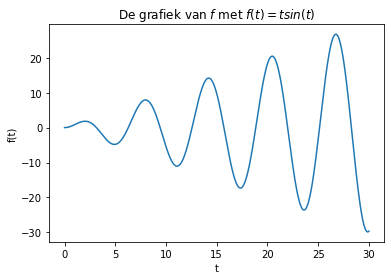

In [2]:
# importeer de nodige bibliotheken
from matplotlib import pyplot as plt

# itereer over alle waarden van 0 tot 30 met tussenstappen van 0,01
data_t = np.arange(0, 30.005, 0.01)

# bereken het resultaat van de functie voor alle beschouwde waarden
data_y = f(data_t)

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten
plt.plot(data_t, data_y)

# breng verduidelijkende labels aan
plt.xlabel("t")
plt.ylabel("f(t)")

# voeg een titel toe
plt.title("De grafiek van $f$ met $f(t) = t sin(t)$")

# toon de grafiek
plt.show()

Zoals reeds uitgelegd werd in de inleiding, kan de **eindige differentiemethode** gebruikt worden om de afgeleide van een functie te schatten. Hierbij wordt gebruik gemaakt van het differentiequotiënt:

$$f'(t) = \frac{\text{d}f(t)}{\text{d}t} \approx \frac{f(t + \Delta t) - f(t)}{\Delta t}$$

In Python is de einde differentiemethode relatief eenvoudig te implementeren:

In [3]:
def differentiequotient(f, t, delta_t):
    '''
    Geeft het differentiequotiënt terug van de functie f voor de waarde t,
    waarbij het tijdsinterval delta_t gegeven is
    
    Parameters
    ----------
    f: function
        de functie f
    t: float
        de variabele t
    delta_t: float
        het tijdsinterval
    
    Returns
    -------
    float
        het differentiequotiënt
    '''
    
    return (f(t + delta_t) - f(t)) / delta_t

Om de afgeleide van de functie $f$ te schatten voor $t = 2$ en $\Delta t = 0.$, volstaat het dan om volgende functieoproep te doen:

In [4]:
print(differentiequotient(f, 2, 0.1))

-0.05855183688728616


Wat gebeurt er als je een kleinere waarde beschouwt voor $\Delta t$?

In [5]:
print(differentiequotient(f, 2, 0.01))

0.06371786322902917


En nog kleiner?

In [6]:
print(differentiequotient(f, 2, 0.001))

0.07567799367991235


Wanneer je kleinere stapjes neemt, neemt de absolute waarde van het verschil $f(t + \Delta t) - f(t)$ typisch af, maar deel je ook door een steeds kleiner getal. Wanneer je de limiet van $\Delta t$ naar 0 beschouwt, convergeert de benadering naar de echte afgeleide $f'(t)$:

$$f'(t) = \lim\limits_{\Delta t \to 0} \frac{f(t + \Delta t) - f(t)}{\Delta t}$$

De afgeleide functie van $f$ met $f(t) = t sin(t)$ is gelijk aan $f'$ met $f'(t) = t cos(t) + sin(t)$, waarvan de grafiek hieronder wordt weergegeven samen met een benadering voor $\Delta t = 1$.

In [7]:
def plot_afgeleide(delta_t):
    '''
    Genereert een grafiek van f'(t) en een schatting van deze functie met de
    eindige differentiemethode met gegeven delta_t
    
    Parameters
    ----------
    delta_t: float
        het tijdsinterval
    '''

    # itereer over alle waarden van 0 tot 30 met tussenstappen van 0,01
    data_x = np.arange(0, 30.005, 0.01)

    # bereken de afgeleide voor alle beschouwde waarden
    data_y = data_x * np.cos(data_x) + np.sin(data_x)

    # maak een nieuwe grafiek aan
    plt.figure()

    # plot de afgeleide
    plt.plot(data_x, data_y, label="Afgeleide")

    # bereken het differentiequotiënt voor delta_t
    data_z = differentiequotient(f, data_x, delta_t)
    
    # plot de schattingen
    plt.plot(data_x, data_z, label="Benadering")

    # voeg een legende toe
    plt.legend(loc="upper right", bbox_to_anchor=(1.54, 1.027))

    # breng verduidelijkende labels aan
    plt.xlabel("t")
    plt.ylabel("f\'(t)")

    # voeg een titel toe
    plt.title(f"De grafiek van $f\'$, met een schatting voor \
              $\Delta t = {delta_t}$")

    # toon de grafiek
    plt.show()

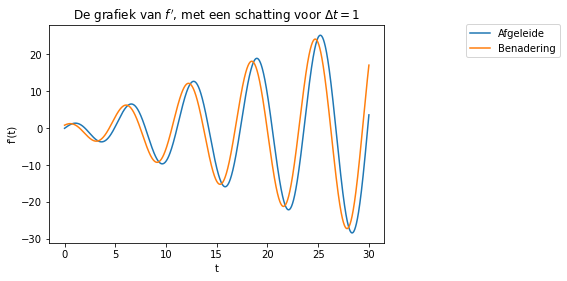

In [8]:
plot_afgeleide(1)

### Opdracht 3

Gebruik de functie `plot_afgeleide` om de impact van de waarde van $\Delta t$ te onderzoeken. Wat stel je vast voor $\Delta t = 0.5$, $\Delta t = 0.1$ en $\Delta t = 0.001$?

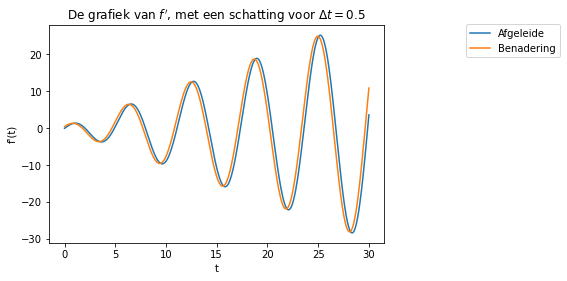

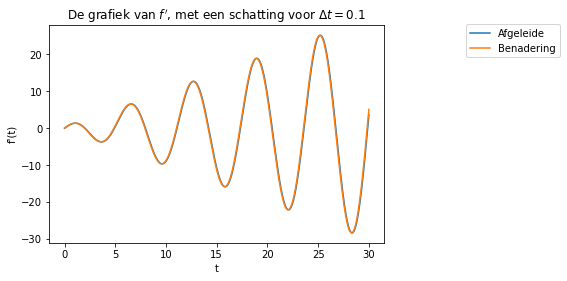

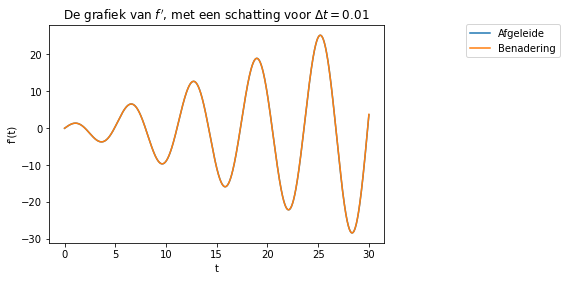

In [9]:
for delta_t in [0.5, 0.1, 0.01]:
    plot_afgeleide(delta_t)

Stel vast dat je de afgeleide inderdaad kunt benaderen met de eindige differentiemethode, en dit bij voorkeur met een zo klein mogelijke $\Delta t$.

### Opdracht 4

Eerder leerde je al dat het functieverloop stijgt daar waar de afgeleide positief is, en dat deze daalt wanneer de afgeleide negatief is. Bereken de waarde van de afgeleide functie $f'$ voor de waarden $t = \frac{\pi}{2}$, $t = \pi$, $t = \frac{3 \pi}{2}$, $t = 2 \pi$, $t = \frac{5 \pi}{2}$, $t = 3 \pi$, $t = \frac{7 \pi}{2}$ en $t = 4 \pi$ met behulp van een for-loop. Controleer visueel of de bekomen waarde voldoet aan je verwachting, gelet op de grafieken hierboven.

In [10]:
for t in np.arange(np.pi / 2, 4.005 * np.pi, np.pi / 2):
    print(f"f'({t:.3f}) = {(t * np.cos(t) + np.sin(t)):.3f}")

f'(1.571) = 1.000
f'(3.142) = -3.142
f'(4.712) = -1.000
f'(6.283) = 6.283
f'(7.854) = 1.000
f'(9.425) = -9.425
f'(10.996) = -1.000
f'(12.566) = 12.566
